# Song popularity prediction
## Group 7:
- Pham Ba Cong
- Nguyen Van Thang
- Pham Nguyen Viet Hoang

# Problem Statement and Motivation

### Problem Statement: Can we leverage machine learning to predict the popularity of a song based on their various features?

This project aims to explore the relationship between a song's inherent characteristics and its success. By building a machine learning model, we hope to gain insights into what factors contribute to a song's popularity and use those insights for prediction.

### Motivation
Predicting song popularity is a complex but valuable challenge with applications in various fields:

- Music Industry: Record labels and artists could use this model to identify songs with higher commercial potential, guiding investment and promotion strategies.
- Streaming Services: Platforms like Spotify could leverage such models to personalize recommendations, leading to a more engaging user experience.
- Music Analysis: The project contributes to the field of Music Information Retrieval (MIR) by exploring the link between objective features and subjective human preference.
- Even if perfect prediction isn't achievable, understanding the underlying trends can offer valuable insights into the ever-evolving landscape of music.

### Dataset: 30000-spotify-songs ([link](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs))

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30000-spotify-songs/readme.md
/kaggle/input/30000-spotify-songs/spotify_songs.csv


# Load Dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tqdm
warnings.filterwarnings("ignore")

spotify = pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv')
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# Exploratory Data Analysis

## Checking Type of Data in Dataset

In [3]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## Summary

**track_id**: Song unique ID \
**track_name**: Song Name \
**track_artist**: Song Artist\
**track_popularity**: Song Popularity (0-100) where higher is better\
**track_album_id**: Album unique ID\
**track_album_name**: Song album name\
**track_album_release_date**: Date when album released\
**playlist_name**: Name of playlist\
**playlist_id**: Playlist ID\
**playlist_genre**: Playlist genre\
**playlist_subgenre**: Playlist subgenre\
**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.\
**energy**: Musical energy (0.0 to 1.0) reflects intensity and activity. Energetic songs feel fast, loud, and busy (think death metal). Calmer pieces (like Bach preludes) have low energy.\
**key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.\
**loudness**: Track loudness (dB) is its perceived intensity, averaged throughout. Useful for comparing relative volume between tracks. (typical range -60 to 0 dB)\
**mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.\
**speechiness**: Speechiness (0-1) indicates spoken content in a track. Higher values mean more speech (1 = all speech). Around 0.66 suggests mostly speech, below 0.33 likely music.\
**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.\
**instrumentalness**: Instrumentalness (0-1) shows likelihood of no singing. Higher values mean more instrumental (1 = no vocals). Rap and spoken word are considered vocals.\
**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.\
**valence**: Mood (0-1) indicates perceived happiness. Higher values mean more positive (1 = happy).\
**tempo**: Track speed (beats per minute) \
**duration_ms**: Length of the song in milliseconds

## Checking a null value

In [4]:
spotify.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are null values in `track_name`, `track_artist`, `track_album_name`

A song can belong to no album at all so no album is understandable but no artist and name is weird so let's take a look at it.

In [5]:
spotify[(spotify['track_name'].isnull()) | (spotify['track_artist'].isnull())]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


5 of these songs does not have a name nor an artist name so lets just remove these

In [6]:
spotify.dropna(inplace=True)

In [7]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

## Checking duplicated value

In [8]:
spotify.duplicated().sum()

0

No duplicated data in the dataset

## Split the `track_album_release_date` column

In [9]:
spotify['album_release_month'] = pd.DatetimeIndex(spotify['track_album_release_date']).month
spotify['album_release_year'] = pd.DatetimeIndex(spotify['track_album_release_date']).year
spotify['album_release_day'] = pd.DatetimeIndex(spotify['track_album_release_date']).day

The columns track_id, track_album_id and playlist_id are only for identification purposes and will not help for our goal so we will remove them, as well as the track_album_release_date as we have created 3 seperate columns for the day month and year above

In [10]:
spotify.drop(columns=['track_id', 'track_album_id', 'playlist_id', 'track_album_release_date'], inplace=True)

In [11]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_name           32828 non-null  object 
 1   track_artist         32828 non-null  object 
 2   track_popularity     32828 non-null  int64  
 3   track_album_name     32828 non-null  object 
 4   playlist_name        32828 non-null  object 
 5   playlist_genre       32828 non-null  object 
 6   playlist_subgenre    32828 non-null  object 
 7   danceability         32828 non-null  float64
 8   energy               32828 non-null  float64
 9   key                  32828 non-null  int64  
 10  loudness             32828 non-null  float64
 11  mode                 32828 non-null  int64  
 12  speechiness          32828 non-null  float64
 13  acousticness         32828 non-null  float64
 14  instrumentalness     32828 non-null  float64
 15  liveness             32828 non-null  floa

## Distribution of Songs by Year of Release

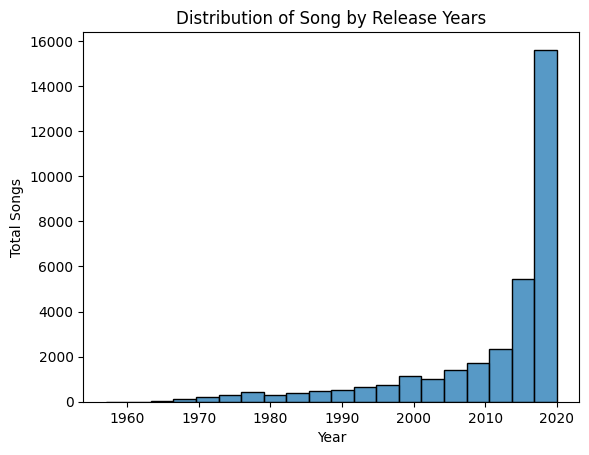

In [12]:
sns.histplot(x='album_release_year', data=spotify, bins=20)
plt.xlabel('Year')
plt.ylabel('Total Songs')
plt.title('Distribution of Song by Release Years')
plt.show()

Most of the song was released from 2010 to 2020

## Total Song & Total Artist by Genre

In [13]:
genre = spotify.groupby('playlist_genre').agg({
    'track_name' : 'count',
    'track_artist': 'nunique'
})

genre.rename(columns={
    'track_name' : 'total_song',
    'track_artist' : 'total_artist'
}, inplace=True)

genre

,total_song,total_artist
playlist_genre,,
edm,6043,2516
latin,5153,2229
pop,5507,2488
r&b,5431,2171
rap,5743,2196
rock,4951,1573


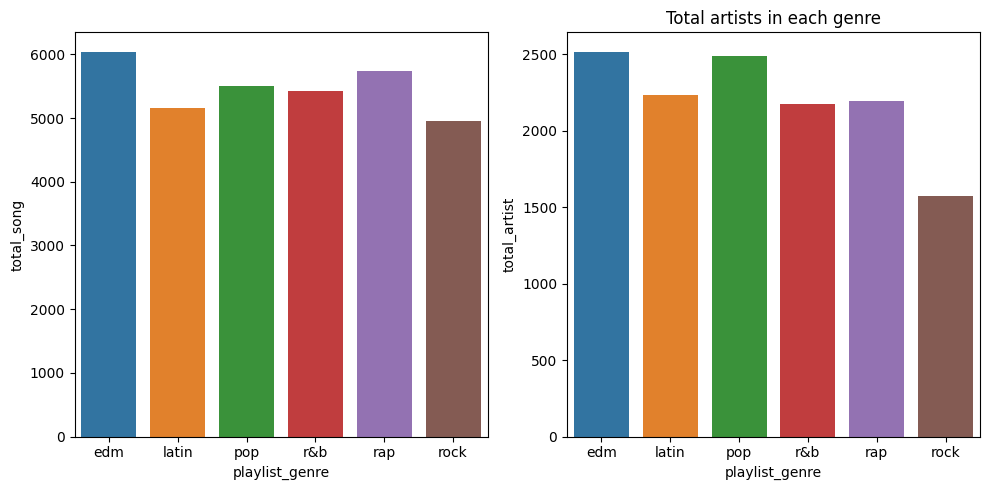

In [14]:
# 'playlist_genre' vs 'total_song'
f, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=genre.index, y='total_song', data=genre, ax=axes[0])
plt.title("Total Song in the Playlist By Genre")
plt.tight_layout()

sns.barplot(x=genre.index, y='total_artist', data=genre)
plt.title("Total artists in each genre")
plt.tight_layout()

plt.show()

Overall, rock music has the least number of songs and total artists while EDM has the most number of songs and artists. However, generally the number is quite close between the genres.

## Relationship of genre with popularity:
We are going to plot the boxplots of track popularity with respect to each genre

<Axes: xlabel='playlist_genre', ylabel='track_popularity'>

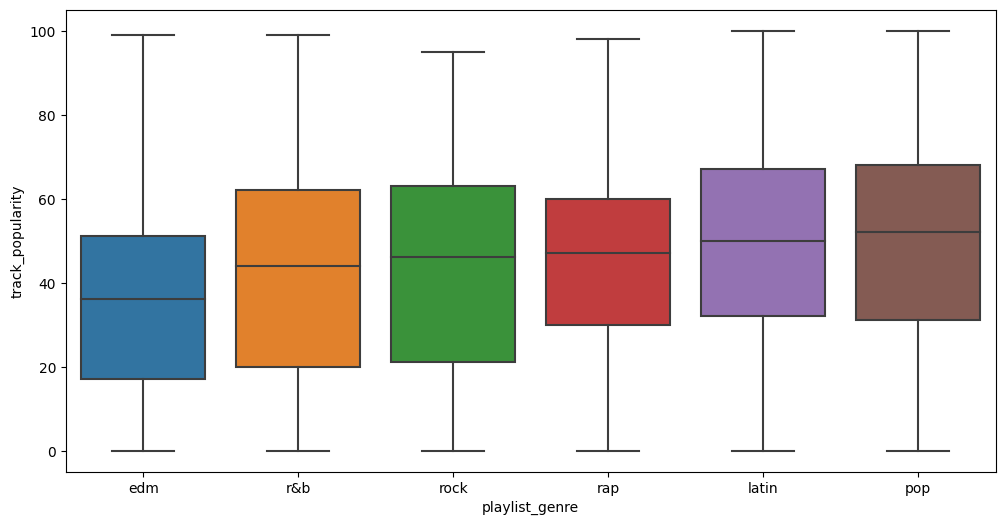

In [15]:
sorted_val=spotify.groupby('playlist_genre')['track_popularity'].median().sort_values()
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=spotify, order=sorted_val.index)

There is a correlation between genre and popularity

## Top 1000 most popular songs

#### Now, let's examine the top 1000 most popular songs

In [16]:
popular = spotify.sort_values('track_popularity', ascending=False).head(1000)
popular

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_month,album_release_year,album_release_day
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,...,0.0924,0.6920,0.000104,0.149,0.513,98.027,209438,10,2019,17
1551,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,"post-teen alternative, indie, pop (large variety)",pop,post-teen pop,0.824,0.588,6,...,0.0924,0.6920,0.000104,0.149,0.513,98.027,209438,10,2019,17
23104,ROXANNE,Arizona Zervas,99,ROXANNE,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,r&b,hip pop,0.621,0.601,6,...,0.1480,0.0522,0.000000,0.460,0.457,116.735,163636,10,2019,10
21468,ROXANNE,Arizona Zervas,99,ROXANNE,Contemporary Urban,r&b,urban contemporary,0.621,0.601,6,...,0.1480,0.0522,0.000000,0.460,0.457,116.735,163636,10,2019,10
20092,ROXANNE,Arizona Zervas,99,ROXANNE,Global Top 50 | 2020 Hits,latin,latin hip hop,0.621,0.601,6,...,0.1480,0.0522,0.000000,0.460,0.457,116.735,163636,10,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20120,The London (feat. J. Cole & Travis Scott),Young Thug,83,The London,Global Top 50 | 2020 Hits,latin,latin hip hop,0.796,0.586,4,...,0.1470,0.0247,0.000000,0.132,0.179,97.981,200107,5,2019,23
1357,Motivation,Normani,83,Motivation,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,pop,post-teen pop,0.599,0.887,4,...,0.0984,0.0192,0.000001,0.300,0.881,170.918,193837,8,2019,16
3786,The Hills,The Weeknd,83,Beauty Behind The Madness,10er Playlist,pop,electropop,0.580,0.565,0,...,0.0488,0.0671,0.000000,0.135,0.138,112.986,242253,8,2015,28
18823,Cuaderno,Dalex,83,Climaxxx,Mansión Reggaetón,latin,reggaeton,0.681,0.648,1,...,0.3800,0.5240,0.000000,0.104,0.687,172.019,286507,5,2019,10


In [17]:
popular_genre = popular.groupby('playlist_genre').agg({
    'track_name' : 'count',
    'track_artist': 'nunique'
})

popular_genre.rename(columns={
    'track_name' : 'total_song',
    'track_artist' : 'total_artist'
}, inplace=True)

popular_genre

,total_song,total_artist
playlist_genre,,
edm,109,69
latin,290,104
pop,254,97
r&b,221,98
rap,106,49
rock,20,13


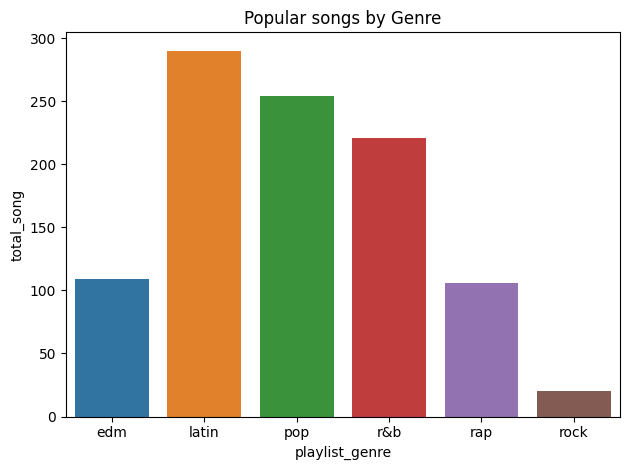

In [18]:
sns.barplot(x=popular_genre.index, y='total_song', data=popular_genre)

plt.title("Popular songs by Genre")
plt.tight_layout()
plt.show()

We can see that the majority of most popular songs are of the genres: pop, r&b and latin. On the other hand, rock music has the least number of songs in the top 1000 most popular. This shows that genres might come in handy when we try to predict the popularity score of a song which we will take a look into when we build our model.

In [19]:
song_counts = popular['track_artist'].value_counts()

popular = popular[popular['track_artist'].isin(song_counts[song_counts >10].index)]

avg_popular = popular.groupby('track_artist')['track_popularity'].mean()

top_artist_by_avg_popular = avg_popular.nlargest(5)
top_artist_by_song_count = song_counts.nlargest(5)

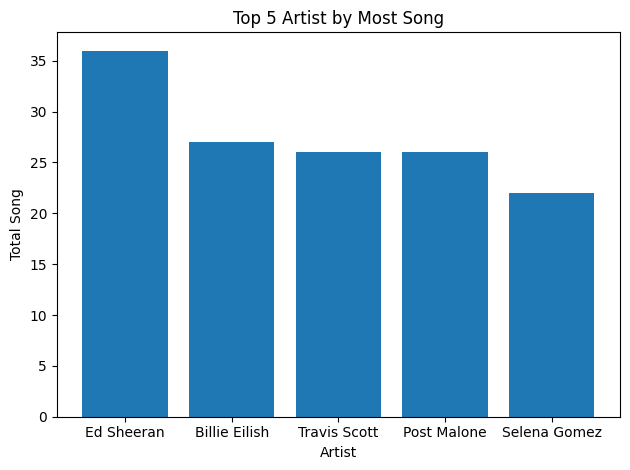

In [20]:
plt.bar(top_artist_by_song_count.index, top_artist_by_song_count.values)
plt.title("Top 5 Artist by Most Song")
plt.xlabel("Artist")
plt.ylabel("Total Song")
plt.tight_layout()
plt.show()

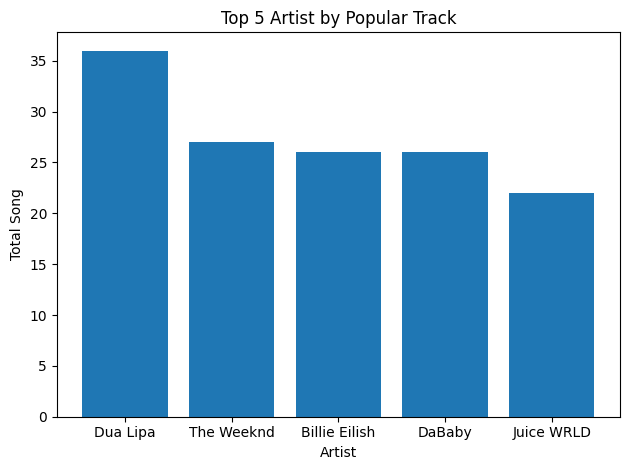

In [21]:
plt.bar(top_artist_by_avg_popular.index, top_artist_by_song_count.values)
plt.title("Top 5 Artist by Popular Track")
plt.xlabel("Artist")
plt.ylabel("Total Song")
plt.tight_layout()
plt.show()

## Top 1000 least popular songs
Now, let's examine the top 1000 least popular songs


In [22]:
least_popular = spotify.sort_values('track_popularity').head(1000)
least_popular

,track_name,track_artist,track_popularity,track_album_name,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_month,album_release_year,album_release_day
11647,Lua Lua Lua - Live,Miguel Rios,0,Rock & Rios (Remastered),Rock and Rios,rock,album rock,0.300,0.952,5,...,0.1010,0.025600,0.000253,0.9670,0.508,95.009,196320,1,2005,1
18991,Ay Amor - Reggaeton,Hector & Tito,0,La Historia Live,Reggaeton Classics,latin,reggaeton,0.576,0.783,9,...,0.0792,0.195000,0.000014,0.1060,0.634,89.879,234773,1,2003,1
18993,Dejale Caer To Peso,Yomo,0,Sangre Nueva Special Edition,Reggaeton Classics,latin,reggaeton,0.864,0.721,3,...,0.1830,0.185000,0.000000,0.0623,0.762,96.026,250093,1,2006,1
18994,Un Sueño,R.K.M & Ken-Y,0,Reggaeton Hits Factory,Reggaeton Classics,latin,reggaeton,0.794,0.741,1,...,0.0622,0.157000,0.033200,0.3090,0.805,95.006,245427,1,2007,1
19127,No Es Culpa Mía,DY,0,No Es Culpa Mía,Reggaeton De Ayer,latin,reggaeton,0.805,0.852,10,...,0.0986,0.437000,0.000001,0.0798,0.714,94.053,107572,5,2017,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3525,Koprolalie,Agonoize,0,Ultraviolent Six,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.580,0.890,7,...,0.0331,0.022600,0.213000,0.1610,0.743,139.980,286948,6,2006,29
3526,Immortal - Single Edit,Solitary Experiments,0,Immortal,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.693,0.999,10,...,0.0719,0.038600,0.608000,0.0833,0.702,132.005,243427,5,2009,29
3529,Roter Stern,Centhron,0,Roter Stern,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.492,0.983,9,...,0.0721,0.000117,0.794000,0.3480,0.457,142.041,334480,8,2009,28
3530,Warmongers,Frozen Plasma,0,Emphasize,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,0.519,0.963,2,...,0.0323,0.000161,0.018000,0.3810,0.172,125.009,309011,11,2006,22


In [23]:
least_popular_genre = least_popular.groupby('playlist_genre').agg({
    'track_name' : 'count',
    'track_artist': 'nunique'
})

least_popular_genre.rename(columns={
    'track_name' : 'total_song',
    'track_artist' : 'total_artist'
}, inplace=True)

least_popular_genre

,total_song,total_artist
playlist_genre,,
edm,319,205
latin,212,105
pop,228,155
rap,28,21
rock,213,88


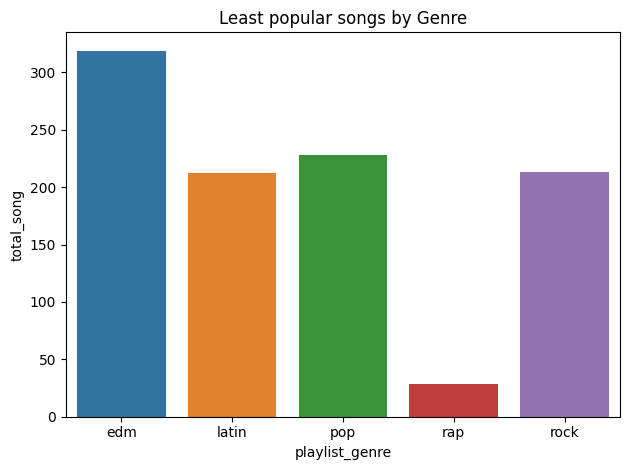

In [24]:
sns.barplot(x=least_popular_genre.index, y='total_song', data=least_popular_genre)

plt.title("Least popular songs by Genre")
plt.tight_layout()
plt.show()

Rap have abnormally low number of songs in the top 1000 least popular, does this means that rap songs are less prone to failure than other genres?

In [25]:
song_counts = least_popular['track_artist'].value_counts()

least_popular = least_popular[least_popular['track_artist'].isin(song_counts[song_counts >10].index)]

avg_popular = least_popular.groupby('track_artist')['track_popularity'].mean()

top_artist_by_avg_popular = avg_popular.nlargest(5)
top_artist_by_song_count = song_counts.nlargest(5)

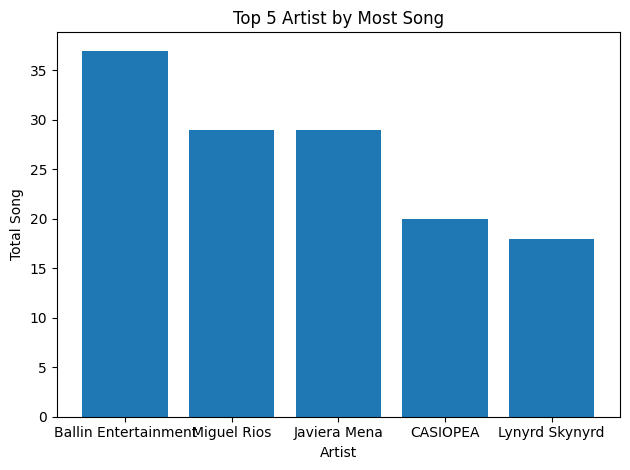

In [26]:
plt.bar(top_artist_by_song_count.index, top_artist_by_song_count.values)
plt.title("Top 5 Artist by Most Song")
plt.xlabel("Artist")
plt.ylabel("Total Song")
plt.tight_layout()
plt.show()

# Predict a Song Track Popularity

## Data Preprocessing

### Calculate the skewness and kurtosis of numerical data

In [27]:
numerical=['track_popularity', 'danceability', 'energy', 'loudness', 
           'speechiness', 'acousticness', 'instrumentalness', 'liveness',
           'valence', 'tempo', 'duration_ms']

In [28]:
spotify[numerical].skew().sort_values()

loudness           -1.363997
energy             -0.636172
danceability       -0.504452
track_popularity   -0.233485
valence            -0.005379
tempo               0.528784
duration_ms         1.149992
acousticness        1.594553
speechiness         1.967659
liveness            2.076842
instrumentalness    2.759187
dtype: float64

In [29]:
spotify[numerical].kurt().sort_values()

track_popularity   -0.932296
valence            -0.900999
energy              0.000280
danceability        0.010048
tempo               0.083368
acousticness        1.877568
duration_ms         2.699284
speechiness         4.264080
loudness            4.489995
liveness            5.067121
instrumentalness    6.272412
dtype: float64

### Univariate analysis

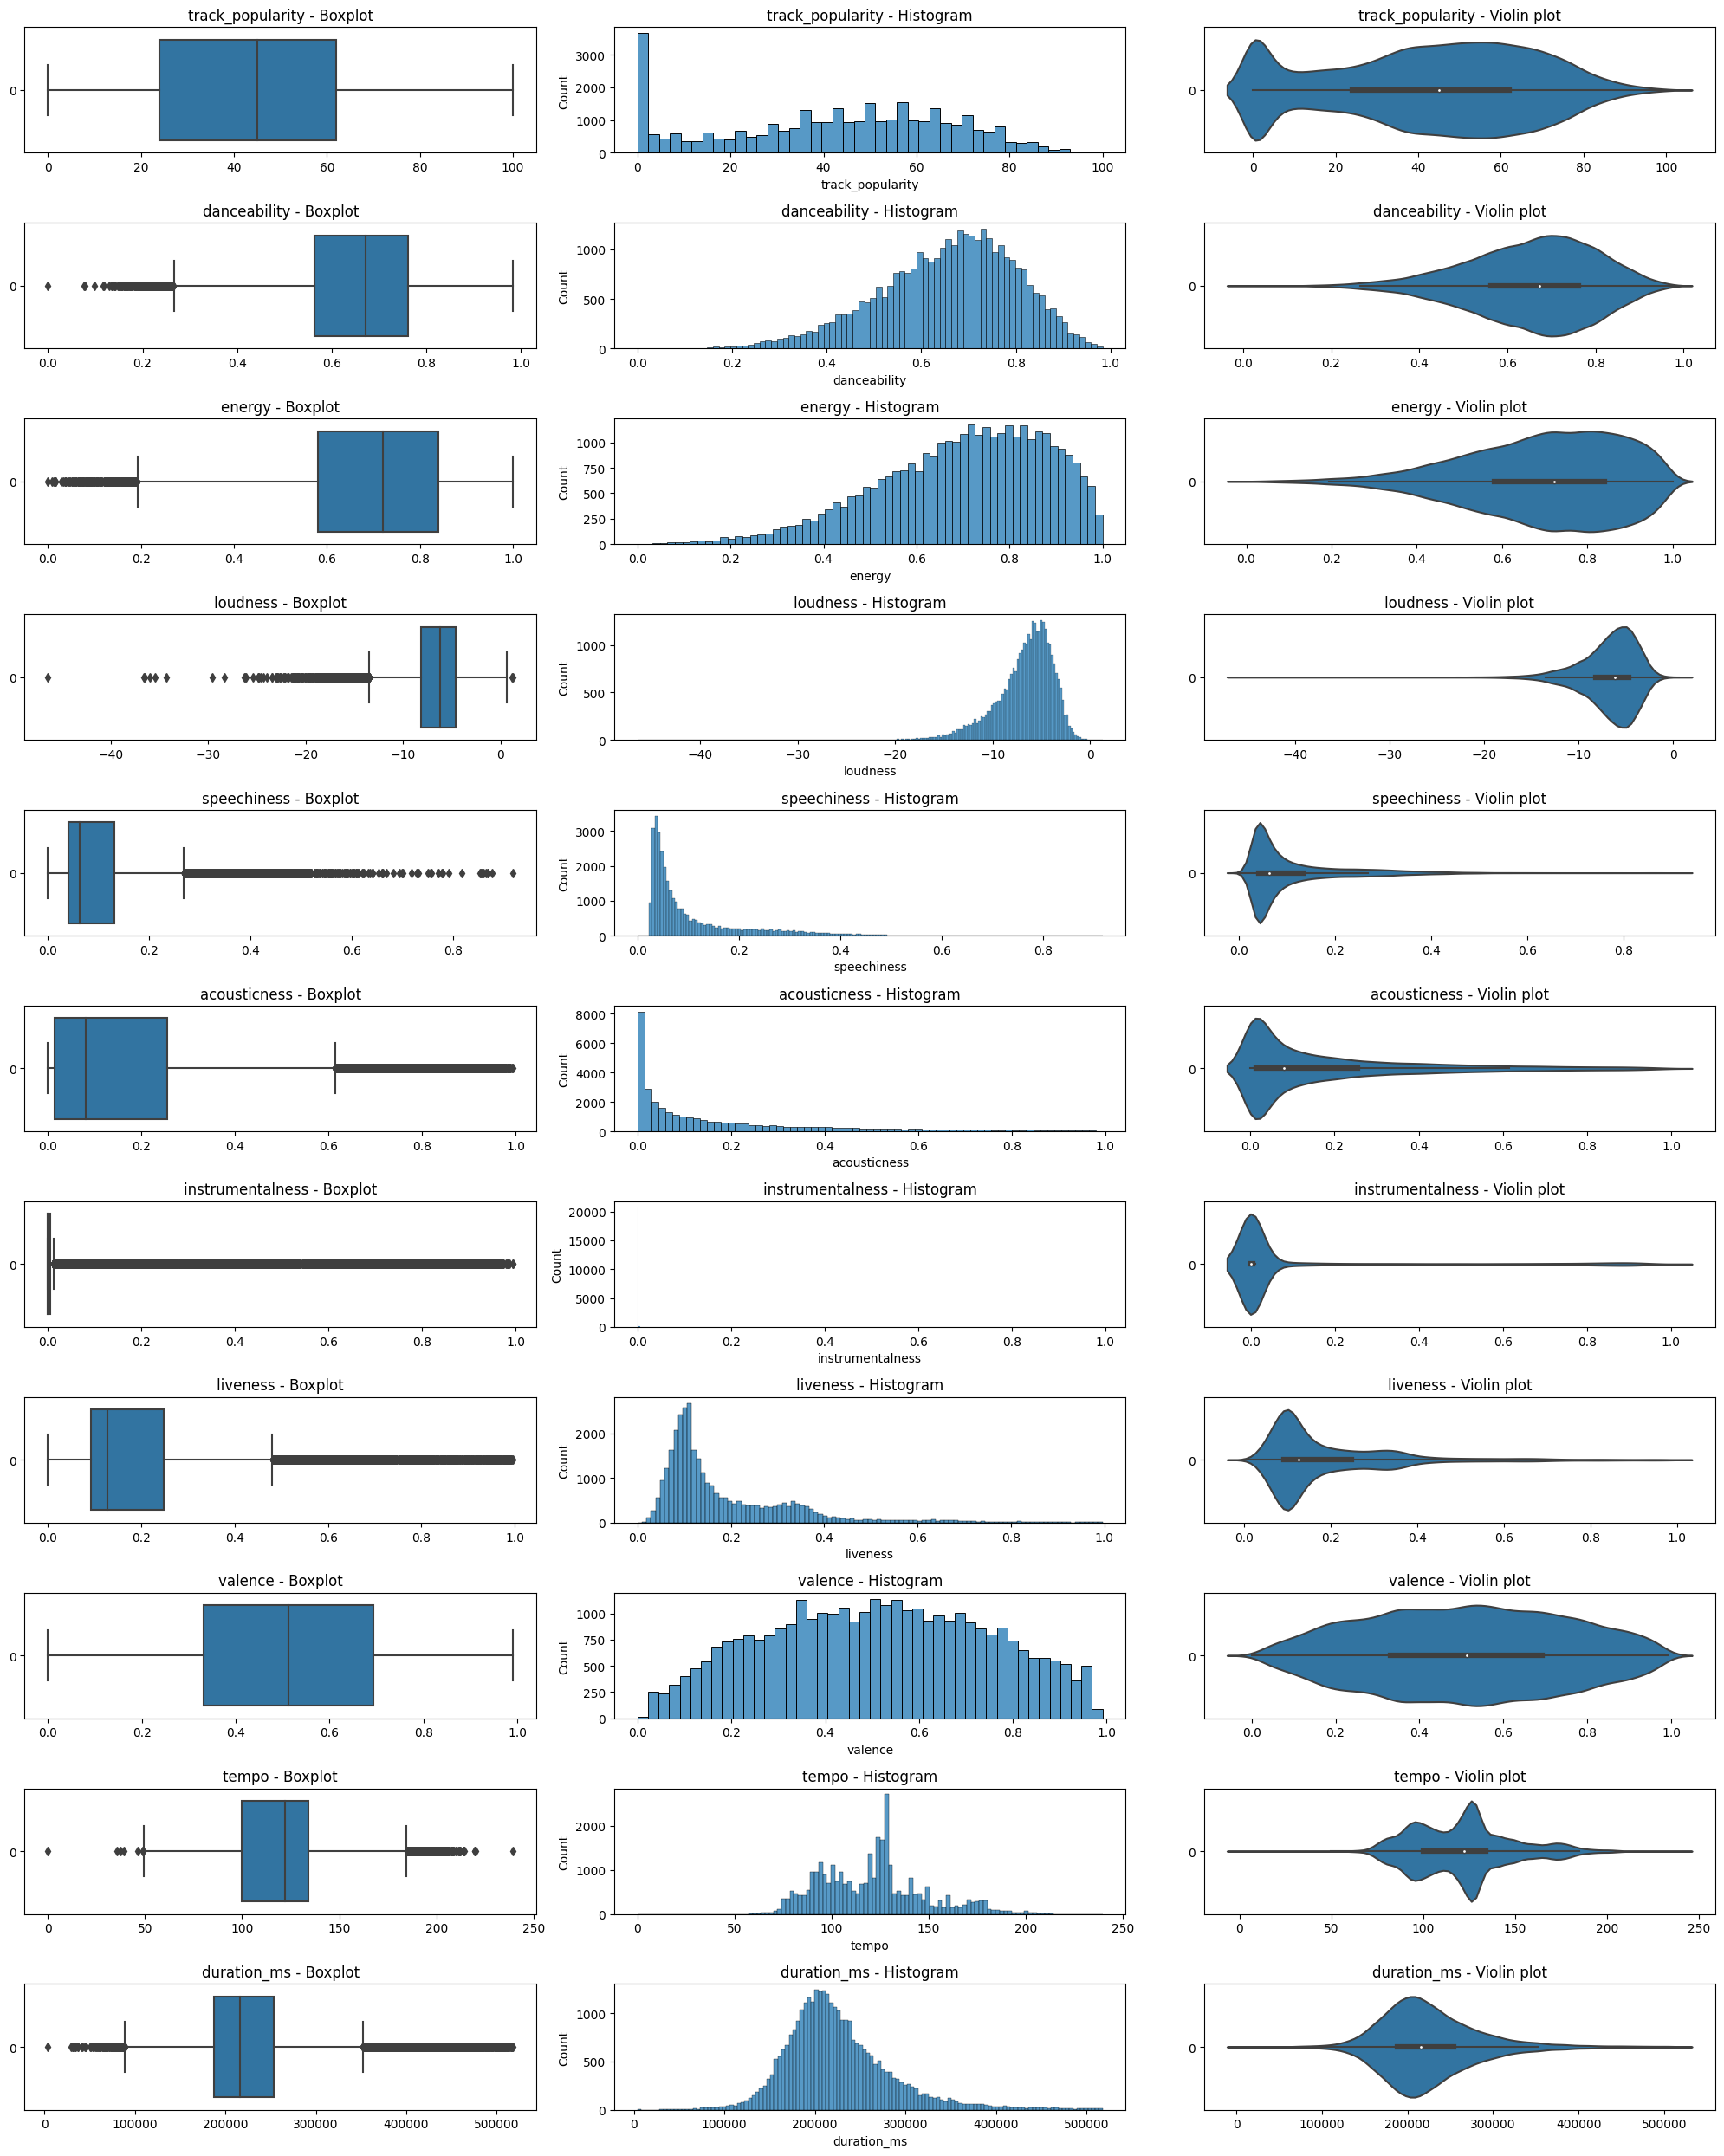

In [30]:
f, axes = plt.subplots(len(numerical), 3, figsize=(20, 25))

count = 0
for column in numerical:
    sns.boxplot(spotify[column], orient = "h", ax = axes[count,0])
    sns.histplot(spotify[column], ax = axes[count,1])
    sns.violinplot(spotify[column], orient = "h", ax = axes[count,2])
    axes[count,0].set_title(column + ' - Boxplot')
    axes[count,1].set_title(column + ' - Histogram')
    axes[count,2].set_title(column + ' - Violin plot')

    count += 1
    
plt.tight_layout()
plt.show()

### Check Correlation Analysis

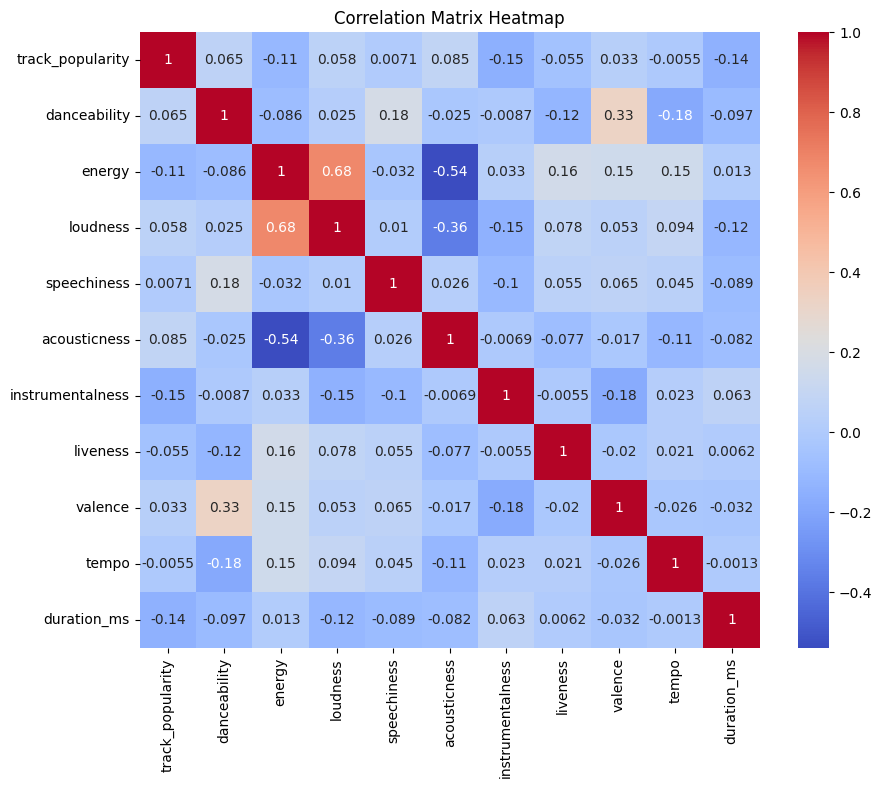

In [31]:
mat_col =['track_popularity', 'danceability','energy', 
          'key', 'loudness', 'mode',
          'speechiness','acousticness','instrumentalness',
          'liveness', 'valence', 'tempo']

corr_mat = spotify[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The track_popularity have very low linear correlation with the other attributes so linear regression might not be a good model choice.

## Removing Outlier

In [32]:
# Create a function to check the outliers:

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
for col in numerical:
    print(col, check_outlier(spotify, col))

track_popularity False
danceability False
energy False
loudness True
speechiness True
acousticness False
instrumentalness False
liveness False
valence False
tempo False
duration_ms False


In [34]:
out_col = ['track_popularity', 'danceability','energy', 
          'key', 'loudness','acousticness',
          'liveness', 'valence', 'tempo']

q1 = spotify[out_col].quantile(0.05)
q3 = spotify[out_col].quantile(0.95)
iqr = q3-q1
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)
# array of Boolean Values
upper_array = np.where(spotify[out_col]>=upper)[0]
lower_array = np.where(spotify[out_col]<=lower)[0]
# removing the outliers
spotify.drop(index=upper_array, inplace=True)
spotify.drop(index=lower_array, inplace=True)

# print the new shape
print("New Shape : ", spotify.shape)

New Shape :  (32820, 22)


### Feature Selection

In [35]:
features = spotify[mat_col].drop(['track_popularity'], axis=1)
target = spotify['track_popularity']

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=7)

X = k_best.fit_transform(features, target)
y = target

In [37]:
# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

instrumentalness: 11.25
energy: 6.60
acousticness: 4.91
loudness: 4.67
danceability: 3.84
liveness: 2.60
speechiness: 2.55
valence: 2.55
key: 2.05
mode: 1.95


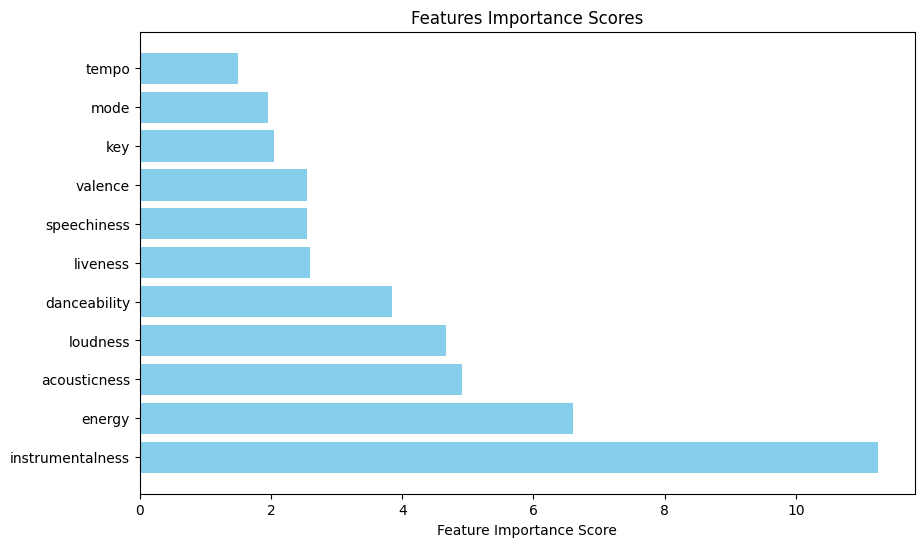

In [38]:
feature_names, feature_scores = zip(*sorted_feature_info[:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

In [39]:
selected_features_df = features.iloc[:, selected_features_indices]
selected_features_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653
1,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570
2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833


## Split Data into Train & Test

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Model

### Let's try fitting our data on some machine learning model:
- **LinearRegression** 
- **ElasticNet** 
- **Lasso** 
- **RidgeGradientBoostingRegressor** 
- **SGDRegressor** 
- **BayesianRidge** 
- **RandomForestRegressor** 
- **LGBMRegressor** 
- **KernelRidge** 
- **XGBRegressor**

In [41]:
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb

In [42]:
kernel = KernelRidge()
lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
xgbr=xgb.XGBRegressor()

In [43]:
models = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm, xgbr]
hashmap={}

In [44]:
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [45]:
for model in tqdm.tqdm(models):
    compute(model)
hashmap

100%|██████████| 12/12 [03:47<00:00, 18.94s/it]


{'LinearRegression()': (0.04726865642761435, 24.329918903027004),
 'ElasticNet()': (0.036902045026276364, 24.46192696044242),
 'Lasso()': (0.041166417678709655, 24.407711032289882),
 'Ridge()': (0.047270040149070214, 24.329901234959685),
 'SVR()': (0.04377457646709082, 24.374492267003532),
 'GradientBoostingRegressor()': (0.0804650633536027, 23.902292239102103),
 'SGDRegressor()': (0.04448980285340354, 24.365374886991187),
 'BayesianRidge()': (0.04734968761965297, 24.32888423346073),
 'RandomForestRegressor()': (0.25216760647404135, 21.555473707614315),
 'KernelRidge()': (-2.807866369130226, 48.64030441683158),
 'LGBMRegressor()': (0.11272795961380022, 23.479229067924496),
 'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, grow_policy=N

In [46]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)
score

,R2_score,RMSE
RandomForestRegressor(),0.252168,21.555474
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=None, ...)",0.125511,23.309481
LGBMRegressor(),0.112728,23.479229
GradientBoostingRegressor(),0.080465,23.902292
BayesianRidge(),0.047350,24.328884
Ridge(),0.047270,24.329901
LinearRegression(),0.047269,24.329919
SGDRegressor(),0.044490,24.365375
SVR(),0.043775,24.374492
Lasso(),0.041166,24.407711


In [47]:
def evaluate():    #Function for evaluating XGBoost model
    y_train_pred = xgbr.predict(X_train)
    y_test_pred = xgbr.predict(X_test)
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 4)
    axes[0].set_xlabel("True values of popularity (Train)")
    axes[0].set_ylabel("Predicted values popularity (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 4)
    axes[1].set_xlabel("True values of popularity (Test)")
    axes[1].set_ylabel("Predicted values of popularity (Test)")
    plt.show()

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_train,y_train_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", r2_score(y_test,y_test_pred))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

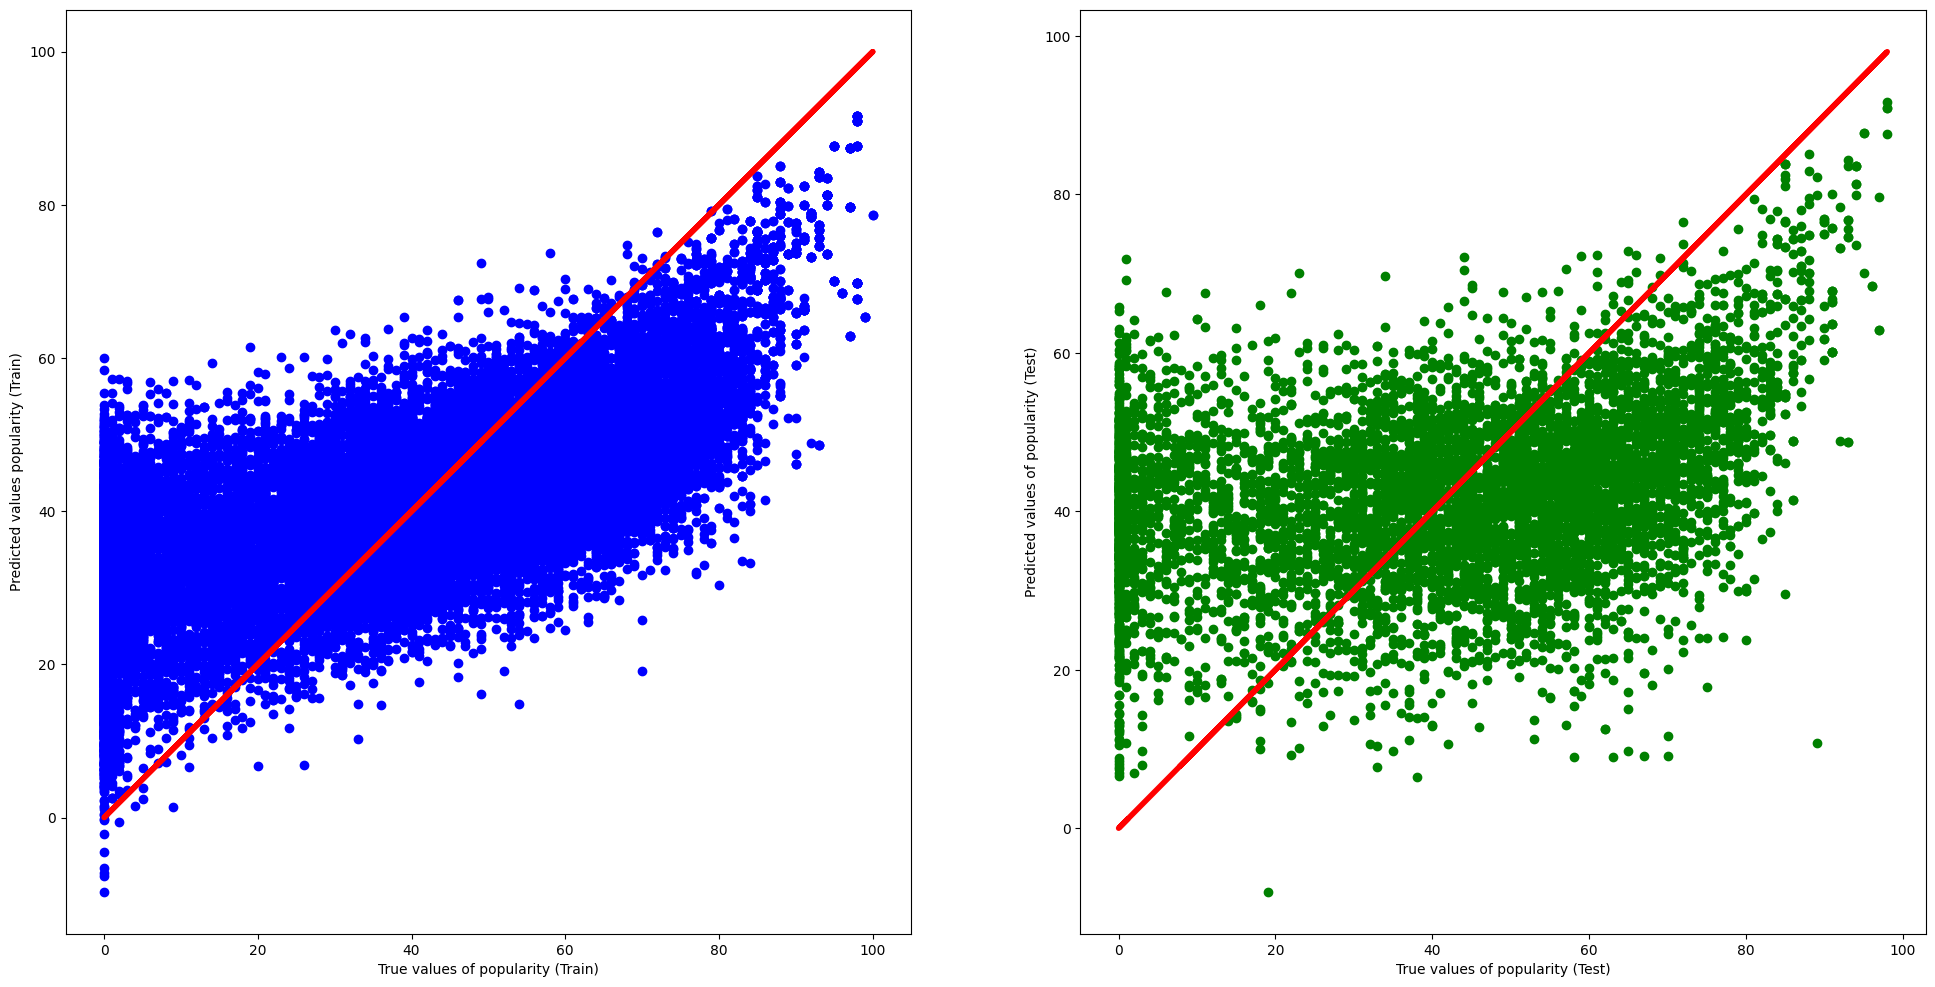

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4759757489362566
Mean Squared Error (MSE) 	: 327.33837481522045

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.12551104448499806
Mean Squared Error (MSE) 	: 543.3318929702887



In [48]:
evaluate()

Seems like predicting using only numerical data is not giving promising results. We should give our model more information. Now, let's encode some of the categorical variables to use in the model

## Encoding the categorical variables
Artist seems like a good place to start, the past performance of the artists' song will be a good indicator of their new song performances. Because of this, we will encode the artists into ordinal values (from most popular previous songs to least popular previous songs). 

In [49]:
artist_popularity = spotify.groupby('track_artist')['track_popularity'].mean()

In [50]:
artist_popularity=artist_popularity.sort_values(ascending=False)
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
result = encoder.fit_transform(artist_popularity.values.reshape(-1, 1))
result=result.flatten()

In [51]:
artist_popularity=artist_popularity.index
artist_popularity=pd.Series(artist_popularity)
artist_popularity

0                       Trevor Daniel
1                                 Y2K
2                         Don Toliver
3                         Roddy Ricch
4                              DaBaby
                     ...             
10682                      Cathercist
10683            Guille El Invencible
10684    Gucci Mane feat. Young Jeezy
10685                      Groovezone
10686                         Jonelle
Name: track_artist, Length: 10687, dtype: object

In [52]:
result=pd.Series(result)
popularity = pd.concat([artist_popularity, result], axis=1)
popularity

,track_artist,0
0,Trevor Daniel,1293.0
1,Y2K,1292.0
2,Don Toliver,1291.0
3,Roddy Ricch,1290.0
4,DaBaby,1289.0
...,...,...
10682,Cathercist,0.0
10683,Guille El Invencible,0.0
10684,Gucci Mane feat. Young Jeezy,0.0
10685,Groovezone,0.0


In [53]:
spotify['track_artist'].replace(artist_popularity.values, result, inplace=True)

In [54]:
numerical=['track_popularity', 'danceability', 'energy', 'loudness', 
           'speechiness', 'acousticness', 'instrumentalness', 'liveness',
           'valence', 'tempo', 'duration_ms', 'track_artist']

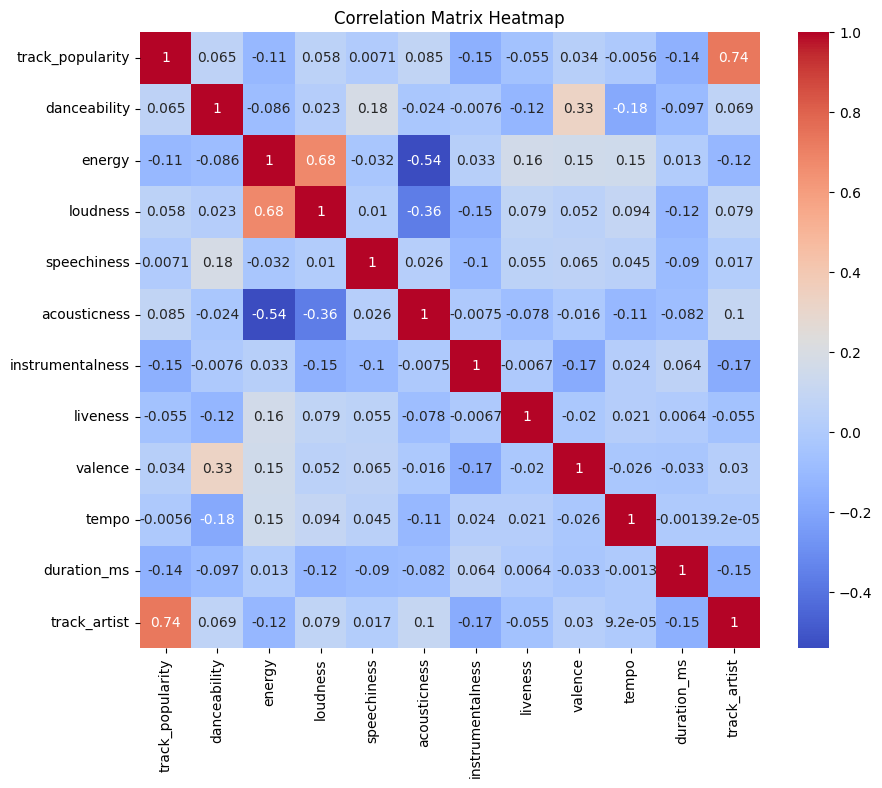

In [55]:
corr_mat = spotify[numerical].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

### One-hot encoding the genres
We will one-hot-encode the genres for use in the regression model

In [56]:
spotify=pd.get_dummies(spotify, columns=['playlist_genre'])

## Fitting model with new feature
Now lets try fitting the model onto both the existing and the new feature we created

In [57]:
spotify.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'playlist_name', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'album_release_month',
       'album_release_year', 'album_release_day', 'playlist_genre_edm',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock'],
      dtype='object')

In [58]:
columns=['track_popularity', 'danceability', 'energy', 'loudness', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'track_artist', 'playlist_genre_edm',
        'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
        'playlist_genre_rap', 'playlist_genre_rock']

In [59]:
features = spotify[numerical].drop(['track_popularity'], axis=1)
target = spotify['track_popularity']

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(features)
y = target

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
kernel = KernelRidge()
lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
xgbr=xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [63]:
models = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm, xgbr]
hashmap={}

In [64]:
for model in tqdm.tqdm(models):
    compute(model)
hashmap

100%|██████████| 12/12 [03:54<00:00, 19.54s/it]


{'LinearRegression()': (0.5345468664593126, 17.00565695124704),
 'ElasticNet()': (0.4716182621504371, 18.11879595566439),
 'Lasso()': (0.5317878387518928, 17.055983988568613),
 'Ridge()': (0.5345467996130906, 17.005658172383818),
 'SVR()': (0.5248771878869558, 17.181393170498776),
 'GradientBoostingRegressor()': (0.5457957671322089, 16.79890690544566),
 'SGDRegressor()': (0.5331978917672718, 17.03028199073671),
 'BayesianRidge()': (0.5345461625450103, 17.005669810243745),
 'RandomForestRegressor()': (0.5828289224115266, 16.099505262264056),
 'KernelRidge()': (-2.373867751706395, 45.78460401150073),
 'LGBMRegressor()': (0.558099443731669, 16.56981688039226),
 'XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,\n             device=None, early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,\n             importance_type=N

In [65]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)
score

,R2_score,RMSE
RandomForestRegressor(),0.582829,16.099505
"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,\n device=None, early_stopping_rounds=None, enable_categorical=False,\n eval_metric=None, feature_types=None, gamma=0, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=0.08, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=7,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=100,\n n_jobs=None, num_parallel_tree=None, random_state=None, ...)",0.563123,16.475372
LGBMRegressor(),0.558099,16.569817
GradientBoostingRegressor(),0.545796,16.798907
LinearRegression(),0.534547,17.005657
Ridge(),0.534547,17.005658
BayesianRidge(),0.534546,17.005670
SGDRegressor(),0.533198,17.030282
Lasso(),0.531788,17.055984
SVR(),0.524877,17.181393


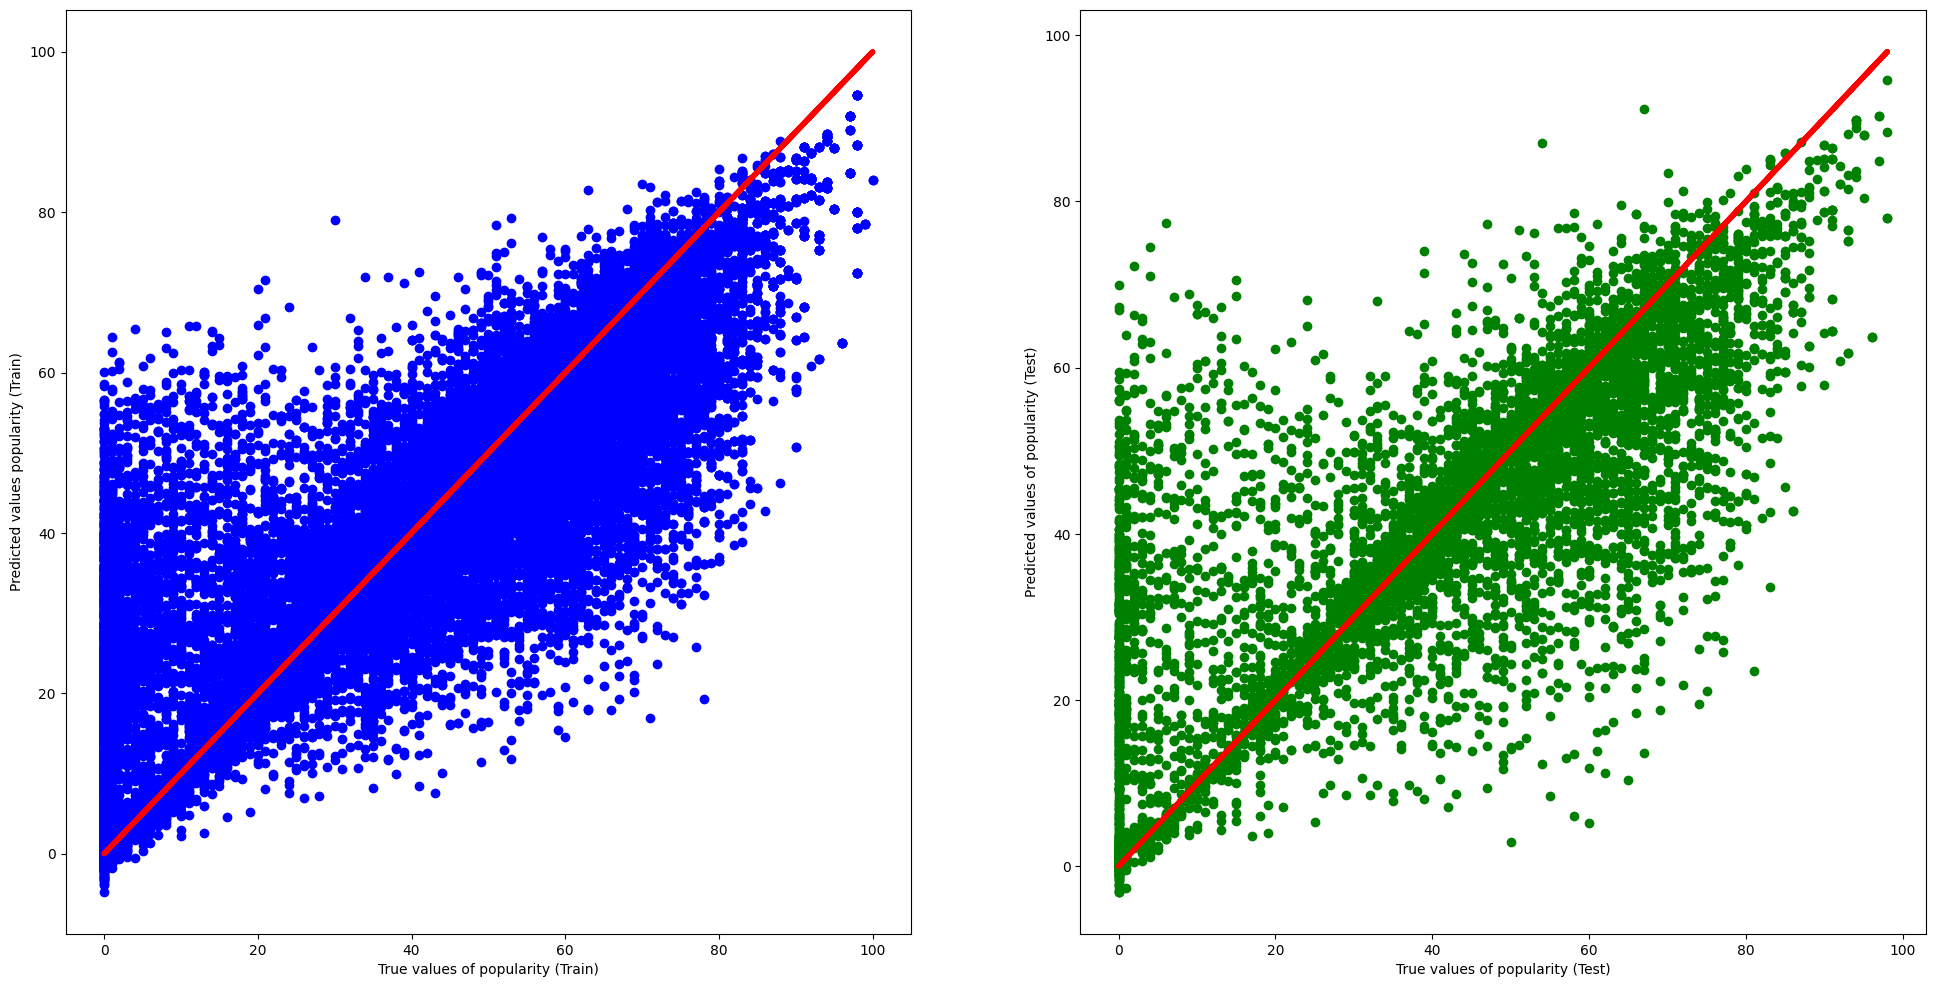

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6912219210831512
Mean Squared Error (MSE) 	: 192.88213155408377

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5631225699107072
Mean Squared Error (MSE) 	: 271.4378947720608



In [66]:
evaluate()

We can see that the performance have improved by quite alot and the best model is XGBRegressor. However, the predictions are quite inaccurate at lower popularity values and is better at higher popularity values. 

Now, we will try to improve the performance by fine tuning the XGBRegressor hyperparameter

## Fine tuning XGBRegressor model
We will use grid search to fine-tune the model for better performance

In [67]:
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [4,7,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train,y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}
Lowest RMSE:  15.978138176790333


In [68]:
xgbr=xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.01, max_depth = 10, n_estimators = 1000)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

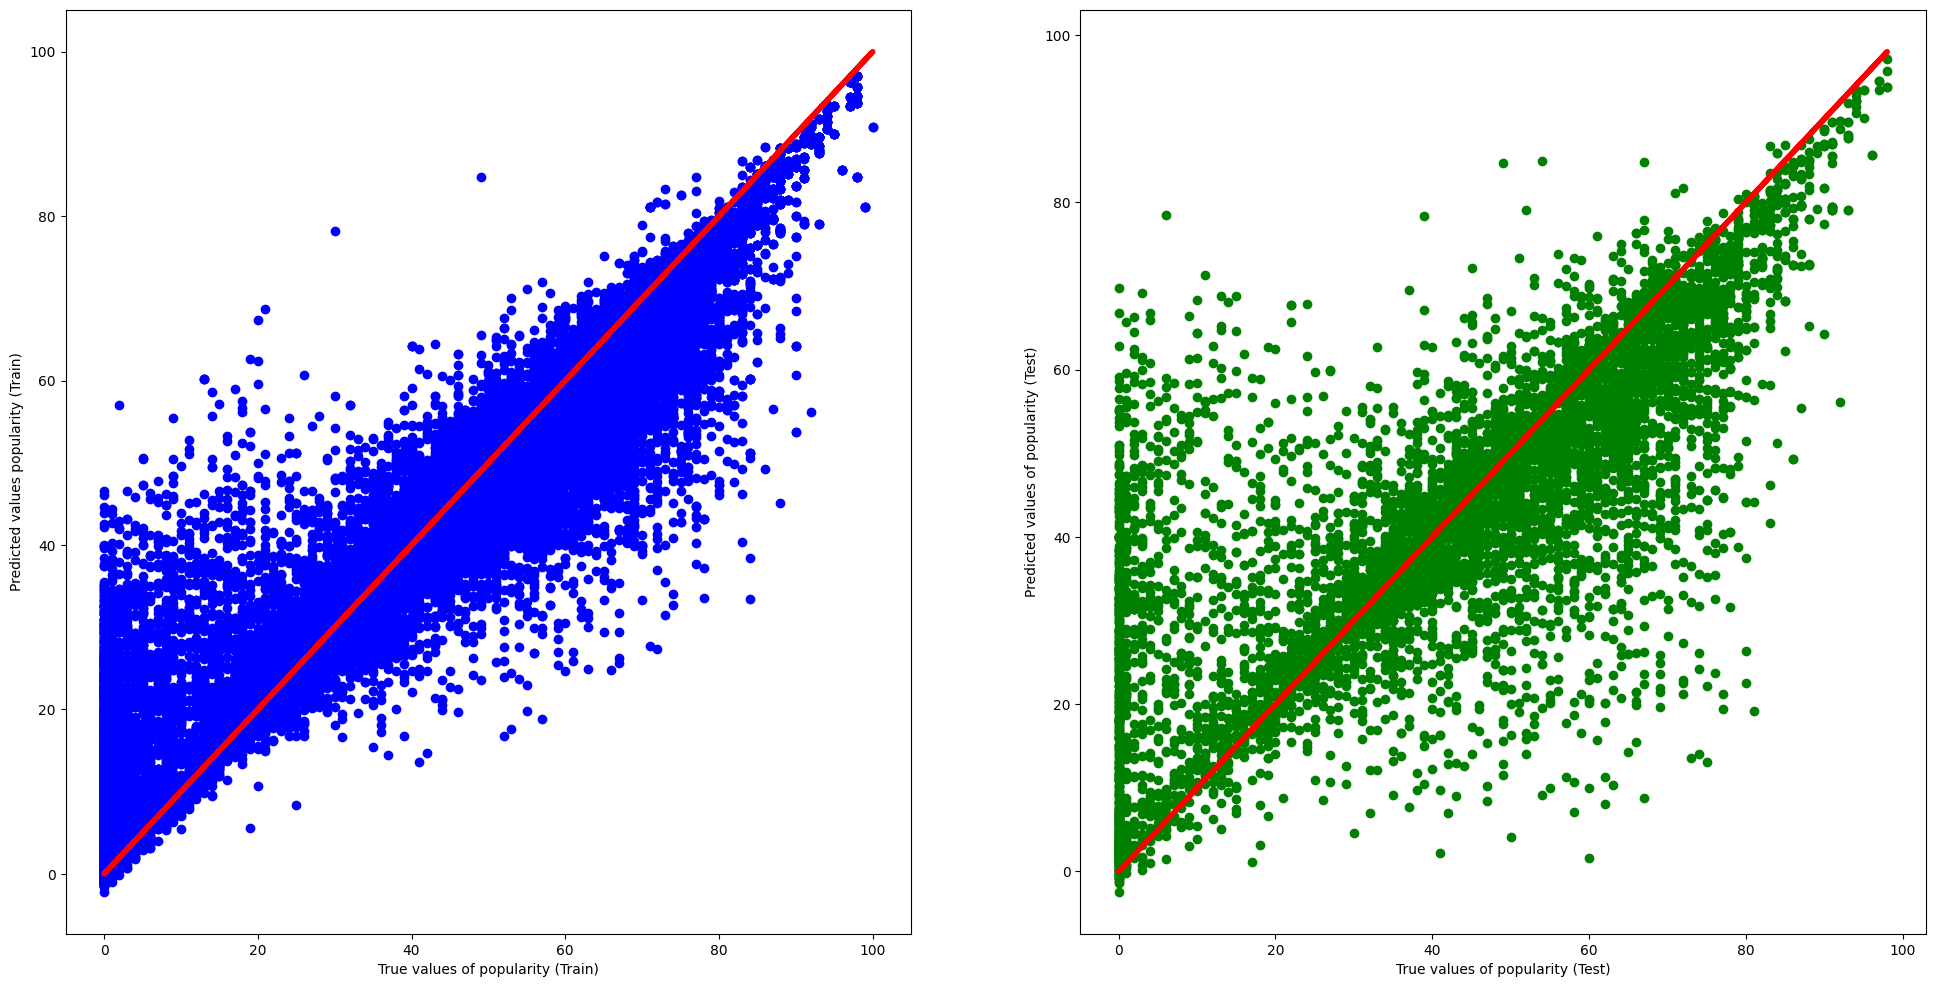

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8747617494787246
Mean Squared Error (MSE) 	: 78.23165685007383

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5879052909602556
Mean Squared Error (MSE) 	: 256.0400528028894



In [69]:
evaluate()

From the plot, it seems like our prediction are quite good for larger values while for values from 0 to 10, the predictions are quite unreliable.

However compare to the previous model using only numerical data, this model is much better.

# Conclusion

### Key Findings and Project Limitations
Our exploration of the 30,000 song dataset yielded valuable insights, but also highlighted limitations that future efforts can address:

- **Temporal Focus**: The majority of songs belonged to the post-2010 era. This suggests the model's predictions might be more applicable to contemporary music.
- **Artist Influence**: A strong correlation emerged between past artist performance and the popularity of new songs. This underscores the importance of artist reputation in influencing success.
- **Genre Trends**: Pop music dominated the dataset in terms of popularity, while rock held the least prominent position. However, these findings may not reflect the broader musical landscape.
- **Model Accuracy**: While the model captured some aspects of song popularity, its limitations require further development for practical use. Predicting the success of artistic works is inherently complex, as numerous factors beyond the scope of our data (marketing, catchiness, regional appeal) play a role.

These insights provide a foundation for future iterations of the project. 

# Future improvements:

### External Data Integration: 
Go beyond the initial 30,000 song dataset by incorporating external sources. This could include:
- **Artist Demographics**: Include region of origin, genre popularity in specific regions, and artist's historical performance data.
- **Marketing Spend**: If available, incorporate data on marketing expenses associated with each song.
- **Social Media Buzz**: Analyze social media mentions and sentiment surrounding the song's release.
- **Subjective Feature Representation**: Address the challenge of capturing subjective qualities like "catchiness." We can explore:
    - **Crowdsourcing**: Design surveys to get user ratings on aspects like catchiness, memorability, or emotional impact.
    - **Music Theory Analysis**: Analyze features like chord progressions, melodic patterns, and rhythmic complexity that might influence audience perception.

### Advanced Model Exploration:
While the initial model might be simpler, let's explore the potential of more sophisticated approaches:

- **Neural Networks**: Utilize deep learning models like Convolutional Neural Networks (CNNs) to directly analyze audio features. CNNs can extract complex patterns from raw audio data, potentially capturing aspects like melody, rhythm, and instrumentation that influence popularity.
- **Text Analysis**: Employ Natural Language Processing (NLP) techniques to analyze song lyrics or artist interviews. Sentiment analysis of lyrics could reveal emotional themes that resonate with listeners.

By incorporating these enhancements, we can create a more comprehensive model that considers not just inherent song characteristics but also external factors and subjective user perception. This will lead to a more robust and nuanced understanding of song popularity.